<a href="https://colab.research.google.com/github/mike1336git/colab_notebook/blob/main/MLstudy/MLstudy01_mnist_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 13s 7ms/step - loss: 0.3497 - accuracy: 0.8941 - val_loss: 0.0806 - val_accuracy: 0.9777
Epoch 2/15
422/422 [==============================] - 2s 6ms/step - loss: 0.1060 - accuracy: 0.9679 - val_loss: 0.0551 - val_accuracy: 0.9853
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0785 - accuracy: 0.9765 - val_loss: 0.0473 - val_accuracy: 0.9873
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0688 - accuracy: 0.9789 - val_loss: 0.0427 - val_accuracy: 0.9878
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0575 - accuracy: 0.9822 - val_loss: 0.0409 - val_accuracy: 0.9880
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0530 - accuracy: 0.9839 - val_loss: 0.0367 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0477 - accuracy: 0.9850 - val_loss: 0.0354 - val_accuracy: 0.9907
Epoch

## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02571396715939045
Test accuracy: 0.9909999966621399


In [ ]:
print(len(score))

2


# study

In [ ]:
#@title ex_1 float32 --> float16 ( almost no effect on accuracy )



# Setup
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers



# Prepare the data
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# Scale images to the [0, 1] range
#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32") / 255
x_train = x_train.astype("float16") / 255
x_test = x_test.astype("float16") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape, dtype="float16"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



# Train the model
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 1600)              0         
                                              

In [ ]:
#@title ex_2 add dense layer --> no good (no effect)



# Setup
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers



# Prepare the data
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# Scale images to the [0, 1] range
#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32") / 255
x_train = x_train.astype("float16") / 255
x_test = x_test.astype("float16") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape, dtype="float16"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dense(5*5*16, activation="relu"), # add dense layer
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



# Train the model
print("-- train --")
batch_size = 400
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



# Evaluate the trained model
print("-- evaluate --")
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dense_33 (Dense)            (None, 5, 5, 400)         26000     
                                              

In [ ]:
#@title ex_3 add dense layer --> better



# Setup
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers



# Prepare the data
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# Scale images to the [0, 1] range
#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32") / 255
x_train = x_train.astype("float16") / 255
x_test = x_test.astype("float16") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape, dtype="float16"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(5*5*4, activation="relu"), # add dense layer
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



# Train the model
print("-- train --")
batch_size = 200
epochs = 30

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



# Evaluate the trained model
print("-- evaluate --")
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



11490434/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)     

In [ ]:
#@title ex_4 add conv2d kernel (3,3) --> (5,5)



# Setup
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers



# Prepare the data
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# Scale images to the [0, 1] range
#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32") / 255
x_train = x_train.astype("float16") / 255
x_test = x_test.astype("float16") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape, dtype="float16"),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(5*5*4, activation="relu"), # add dense layer
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



# Train the model
print("-- train --")
batch_size = 200
epochs = 30

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



# Evaluate the trained model
print("-- evaluate --")
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)          0         
                                               

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                               

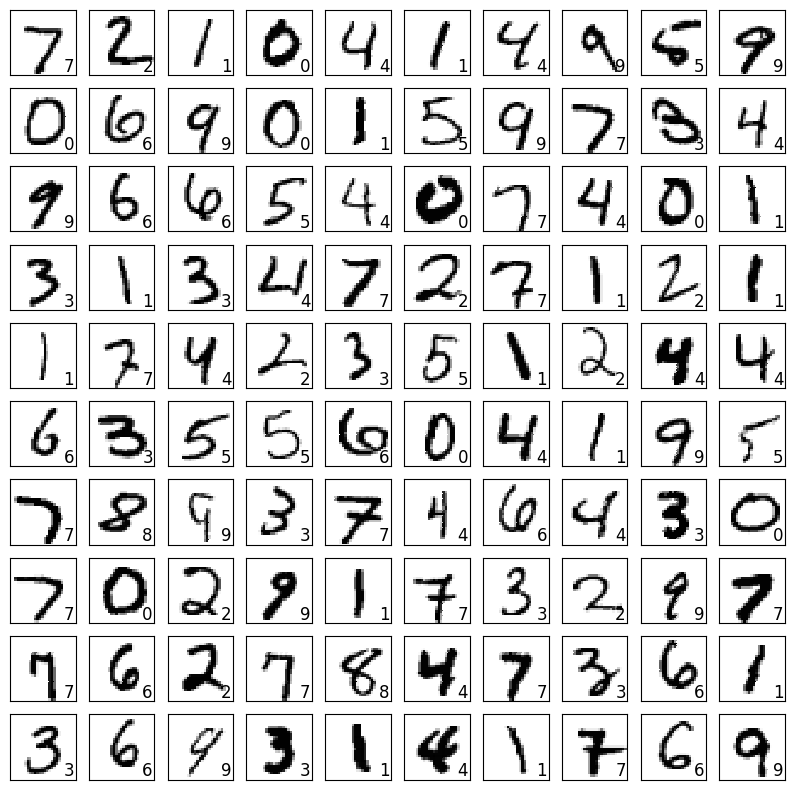

In [ ]:
#@title ex_5 float32 --> float16 + confusion matrix



# Setup
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers



# Prepare the data
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# Scale images to the [0, 1] range
#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32") / 255
x_train = x_train.astype("float16") / 255
x_test = x_test.astype("float16") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape, dtype="float16"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



# Train the model
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("--")
print("Test loss:", score[0])
print("Test accuracy:", score[1])


# confusion matrix
print("")
print("-- confusion matrix row: predict, col: true")
predict_classes = np.argmax(model.predict(x_test[1:10000, ], batch_size=10000), axis=-1)
true_classes = np.argmax(y_test[1:10000], 1)
print(confusion_matrix(true_classes, predict_classes))


# show test image 100 reffernce: https://qiita.com/PoodleMaster/items/f6b7205c4c20948e9c0d
print("")
print("-- show test image 100 --")
def show_test_image100():
    n_show = 100
    y = model.predict(x_test)
    plt.figure(2, figsize=(10, 10))
    plt.gray()
    for i in range(n_show):
        plt.subplot(10, 10, (i+1)) # subplot(row, col, plot #)
        xi = x_test[i, :]
        x = xi.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='red', linewidth=10)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

show_test_image100()


In [ ]:
#@title ex_6 float32 --> float16 + flatten + dropout + output layer only



# Setup
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers



# Prepare the data
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# Scale images to the [0, 1] range
#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32") / 255
x_train = x_train.astype("float16") / 255
x_test = x_test.astype("float16") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape, dtype="float16"),
        #layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        #layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



# Train the model
batch_size = 200
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("--")
print("Test loss:", score[0])
print("Test accuracy:", score[1])


# confusion matrix
print("")
print("-- confusion matrix row: predict, col: true")
predict_classes = np.argmax(model.predict(x_test[1:10000, ], batch_size=10000), axis=-1)
true_classes = np.argmax(y_test[1:10000], 1)
print(confusion_matrix(true_classes, predict_classes))



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout_1 (Dropout)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
270/270 [==============================] - 6s 4ms/step - loss: 0.9569 - accuracy: 0.7244 - val_loss: 0.4380 - val_accuracy: 0.9030
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - l

In [ ]:
#@title ex_7 flatten + dense(100) + dropout(0.5) + output(10) layer



# Setup
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers



# Prepare the data
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# Scale images to the [0, 1] range
#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32") / 255
x_train = x_train.astype("float16") / 255
x_test = x_test.astype("float16") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape, dtype="float16"),
        #layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        #layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



# Train the model
batch_size = 200
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("--")
print("Test loss:", score[0])
print("Test accuracy:", score[1])


# confusion matrix
print("")
print("-- confusion matrix row: predict, col: true")
predict_classes = np.argmax(model.predict(x_test[1:10000, ], batch_size=10000), axis=-1)
true_classes = np.argmax(y_test[1:10000], 1)
print(confusion_matrix(true_classes, predict_classes))



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 0

In [ ]:
#@title ex_8 pooling(2,2) + flatten + dense(100) + dropout(0.5) + output(10) layer



# Setup
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers



# Prepare the data
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# Scale images to the [0, 1] range
#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32") / 255
x_train = x_train.astype("float16") / 255
x_test = x_test.astype("float16") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape, dtype="float16"),
        #layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        #layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



# Train the model
batch_size = 200
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("--")
print("Test loss:", score[0])
print("Test accuracy:", score[1])


# confusion matrix
print("")
print("-- confusion matrix row: predict, col: true")
predict_classes = np.argmax(model.predict(x_test[1:10000, ], batch_size=10000), axis=-1)
true_classes = np.argmax(y_test[1:10000], 1)
print(confusion_matrix(true_classes, predict_classes))



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d (MaxPooling2  (None, 14, 14, 1)         0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 196)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               19700     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 20710 (80.90 KB)
Trainable params